<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prepare-Data" data-toc-modified-id="Prepare-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prepare Data</a></span><ul class="toc-item"><li><span><a href="#1.-Dense-similarity-kernel-in-C++" data-toc-modified-id="1.-Dense-similarity-kernel-in-C++-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1. Dense similarity kernel in C++</a></span></li><li><span><a href="#2.-Dense-similarity-kernel-in-Python" data-toc-modified-id="2.-Dense-similarity-kernel-in-Python-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>2. Dense similarity kernel in Python</a></span></li><li><span><a href="#3.-More-efficient,-scalable-sparse-kernel-alternatives-for-both-flavors" data-toc-modified-id="3.-More-efficient,-scalable-sparse-kernel-alternatives-for-both-flavors-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>3. More efficient, scalable sparse kernel alternatives for both flavors</a></span><ul class="toc-item"><li><span><a href="#a)-Sparse-similarity-kernel-creation-in-C++" data-toc-modified-id="a)-Sparse-similarity-kernel-creation-in-C++-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>a) Sparse similarity kernel creation in C++</a></span></li><li><span><a href="#b)-Sparse-similarity-kernel-creation-in-Python" data-toc-modified-id="b)-Sparse-similarity-kernel-creation-in-Python-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>b) Sparse similarity kernel creation in Python</a></span></li></ul></li><li><span><a href="#Clustered-Implementations" data-toc-modified-id="Clustered-Implementations-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Clustered Implementations</a></span><ul class="toc-item"><li><span><a href="#1.-&quot;clustered&quot;-mode-in-FacilityLocation" data-toc-modified-id="1.-&quot;clustered&quot;-mode-in-FacilityLocation-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>1. "clustered" mode in FacilityLocation</a></span><ul class="toc-item"><li><span><a href="#a)-submodlib-creates-clusters-internally" data-toc-modified-id="a)-submodlib-creates-clusters-internally-1.4.1.1"><span class="toc-item-num">1.4.1.1&nbsp;&nbsp;</span>a) submodlib creates clusters internally</a></span></li><li><span><a href="#b)-User-provides-clusters" data-toc-modified-id="b)-User-provides-clusters-1.4.1.2"><span class="toc-item-num">1.4.1.2&nbsp;&nbsp;</span>b) User provides clusters</a></span></li></ul></li><li><span><a href="#2.-Using-ClusteredFunction" data-toc-modified-id="2.-Using-ClusteredFunction-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>2. Using ClusteredFunction</a></span><ul class="toc-item"><li><span><a href="#a)-submodlib-creates-clusters-internally,-implementation-creates-and-uses-multiple-small-kernels" data-toc-modified-id="a)-submodlib-creates-clusters-internally,-implementation-creates-and-uses-multiple-small-kernels-1.4.2.1"><span class="toc-item-num">1.4.2.1&nbsp;&nbsp;</span>a) submodlib creates clusters internally, implementation creates and uses multiple small kernels</a></span></li><li><span><a href="#b)-User-provides-clusters,-implementation-creates-and-uses-multiple-small-kernels" data-toc-modified-id="b)-User-provides-clusters,-implementation-creates-and-uses-multiple-small-kernels-1.4.2.2"><span class="toc-item-num">1.4.2.2&nbsp;&nbsp;</span>b) User provides clusters, implementation creates and uses multiple small kernels</a></span></li><li><span><a href="#c)-submodlib-creates-clusters-internally,-implementation-creates-and-uses-one-big-kernel" data-toc-modified-id="c)-submodlib-creates-clusters-internally,-implementation-creates-and-uses-one-big-kernel-1.4.2.3"><span class="toc-item-num">1.4.2.3&nbsp;&nbsp;</span>c) submodlib creates clusters internally, implementation creates and uses one big kernel</a></span></li><li><span><a href="#d)-User-provides-clusters,-implementation-creates-and-uses-one-big-kernel" data-toc-modified-id="d)-User-provides-clusters,-implementation-creates-and-uses-one-big-kernel-1.4.2.4"><span class="toc-item-num">1.4.2.4&nbsp;&nbsp;</span>d) User provides clusters, implementation creates and uses one big kernel</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Prepare Data

The first step in using submodlib is obviously to have some data at hand. Below we create a synthetic dataset of 500 points distributed across 10 clusters with a standard deviation of 4. In practice, each data point could correspond to images or video frames or any other dataset where subset selection is desired.

For demonstration, let us create two sample subsets of this dataset such that subset 1 consists of points from the same cluster and subset 2 consists of diverse points from different clusters. 

In [1]:
from sklearn.datasets import make_blobs
num_clusters = 10
cluster_std_dev = 4
num_samples = 500
num_set = 6

points, cluster_ids, centers = make_blobs(n_samples=num_samples, centers=num_clusters, n_features=2, cluster_std=cluster_std_dev, center_box=(0,100), return_centers=True, random_state=4)
data = list(map(tuple, points))
#xs = [x[0] for x in data]
#ys = [x[1] for x in data]

# get num_set data points belonging to cluster#1
import random
random.seed(1)
cluster1Indices = [index for index, val in enumerate(cluster_ids) if val == 1]
subset1 = random.sample(cluster1Indices, num_set)
#subset1xs = [xs[x] for x in subset1]
#subset1ys = [ys[x] for x in subset1]
set1 = set(subset1[:-1])

# get num_set data points belonging to different clusters
subset2 = []
for i in range(num_set):
    #find the index of first point that belongs to cluster i
    diverse_index = cluster_ids.tolist().index(i)
    subset2.append(diverse_index)
#subset2xs = [xs[x] for x in subset2]
#subset2ys = [ys[x] for x in subset2]
set2 = set(subset2[:-1])

import time
import numpy as np
dataArray = np.array(data)

In [2]:
from submodlib.functions.facilityLocation import FacilityLocationFunction

In [3]:
%load_ext scalene

Scalene extension successfully loaded. Note: Scalene currently only
supports CPU profiling inside Jupyter notebooks. For full Scalene
profiling, use the command line version.


In [4]:
%load_ext snakeviz

## 1. Dense similarity kernel in C++

In [5]:
obj1 = FacilityLocationFunction(n=num_samples, mode="dense", data=dataArray, metric="euclidean")
obj1.evaluate(set1)
obj1.evaluate(set2)
obj1.marginalGain(set1, subset1[-1])
obj1.marginalGain(set1, subset2[-1])
obj1.setMemoization(set1)
obj1.evaluateWithMemoization(set1)
obj1.marginalGainWithMemoization(set1, subset1[-1])
obj1.maximize(num_set,'NaiveGreedy', False, False, False)

[(331, 11.1580810546875),
 (451, 10.472545623779297),
 (342, 10.236736297607422),
 (346, 10.190248489379883),
 (403, 9.907894134521484),
 (157, 9.546298027038574)]

In [6]:
%time obj1 = FacilityLocationFunction(n=500, mode="dense", data=dataArray, metric="euclidean")
%time obj1.evaluate(set1)
%time obj1.evaluate(set2)
%time obj1.marginalGain(set1, subset1[-1])
%time obj1.marginalGain(set1, subset2[-1])
%time obj1.setMemoization(set1)
%time obj1.evaluateWithMemoization(set1)
%time obj1.marginalGainWithMemoization(set1, subset1[-1])
%time obj1.maximize(10,'NaiveGreedy', False, False, False)

CPU times: user 232 ms, sys: 21.5 ms, total: 254 ms
Wall time: 253 ms
CPU times: user 68.9 ms, sys: 124 µs, total: 69 ms
Wall time: 68.9 ms
CPU times: user 68.5 ms, sys: 0 ns, total: 68.5 ms
Wall time: 68.5 ms
CPU times: user 68.5 ms, sys: 0 ns, total: 68.5 ms
Wall time: 68.4 ms
CPU times: user 68.4 ms, sys: 0 ns, total: 68.4 ms
Wall time: 68.6 ms
CPU times: user 44 µs, sys: 0 ns, total: 44 µs
Wall time: 46.5 µs
CPU times: user 12 µs, sys: 0 ns, total: 12 µs
Wall time: 14.5 µs
CPU times: user 18 µs, sys: 0 ns, total: 18 µs
Wall time: 20.7 µs
CPU times: user 15.5 ms, sys: 0 ns, total: 15.5 ms
Wall time: 15.5 ms


[(331, 11.1580810546875),
 (451, 10.472545623779297),
 (342, 10.236736297607422),
 (346, 10.190248489379883),
 (403, 9.907894134521484),
 (157, 9.546298027038574),
 (170, 9.379223823547363),
 (408, 8.463824272155762),
 (420, 8.064860343933105),
 (350, 6.620663642883301)]

In [7]:
%timeit obj1 = FacilityLocationFunction(n=500, mode="dense", data=dataArray, metric="euclidean")
%timeit obj1.evaluate(set1)
%timeit obj1.evaluate(set2)
%timeit obj1.marginalGain(set1, subset1[-1])
%timeit obj1.marginalGain(set1, subset2[-1])
%timeit obj1.setMemoization(set1)
%timeit obj1.evaluateWithMemoization(set1)
%timeit obj1.marginalGainWithMemoization(set1, subset1[-1])
%timeit obj1.maximize(10,'NaiveGreedy', False, False, False)

229 ms ± 1.06 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
69.3 ms ± 145 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
69.9 ms ± 1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
69.4 ms ± 273 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
69.4 ms ± 117 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
17.5 µs ± 454 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.18 µs ± 4.35 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.33 µs ± 8.33 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
15.2 ms ± 35 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
%load_ext memory_profiler

In [9]:
%memit obj1 = FacilityLocationFunction(n=500, mode="dense", data=dataArray, metric="euclidean")
%memit obj1.evaluate(set1)
%memit obj1.evaluate(set2)
%memit obj1.marginalGain(set1, subset1[-1])
%memit obj1.marginalGain(set1, subset2[-1])
%memit obj1.setMemoization(set1)
%memit obj1.evaluateWithMemoization(set1)
%memit obj1.marginalGainWithMemoization(set1, subset1[-1])
%memit obj1.maximize(10,'NaiveGreedy', False, False, False)

peak memory: 158.50 MiB, increment: 15.57 MiB
peak memory: 150.13 MiB, increment: 0.43 MiB
peak memory: 150.14 MiB, increment: 0.00 MiB
peak memory: 150.14 MiB, increment: 0.00 MiB
peak memory: 149.89 MiB, increment: 0.00 MiB
peak memory: 149.89 MiB, increment: 0.00 MiB
peak memory: 149.89 MiB, increment: 0.00 MiB
peak memory: 149.89 MiB, increment: 0.00 MiB
peak memory: 149.89 MiB, increment: 0.00 MiB


In [10]:
%%scalene
obj1 = FacilityLocationFunction(n=500, mode="dense", data=dataArray, metric="euclidean")
obj1.evaluate(set1)
obj1.evaluate(set2)
obj1.marginalGain(set1, subset1[-1])
obj1.marginalGain(set1, subset2[-1])
obj1.setMemoization(set1)
obj1.evaluateWithMemoization(set1)
obj1.marginalGainWithMemoization(set1, subset1[-1])
obj1.maximize(10,'NaiveGreedy', False, False, False)

In [11]:
%%snakeviz
obj1 = FacilityLocationFunction(n=500, mode="dense", data=dataArray, metric="euclidean")
obj1.evaluate(set1)
obj1.evaluate(set2)
obj1.marginalGain(set1, subset1[-1])
obj1.marginalGain(set1, subset2[-1])
obj1.setMemoization(set1)
obj1.evaluateWithMemoization(set1)
obj1.marginalGainWithMemoization(set1, subset1[-1])
obj1.maximize(10,'NaiveGreedy', False, False, False)

 
*** Profile stats marshalled to file '/tmp/tmpz5mh91yx'. 
Embedding SnakeViz in this document...


## 2. Dense similarity kernel in Python

If dense similarity kernel is to be created in Python, the user may use the create_kernel() helper function provided by submodlib and pass the kernel as argument to Facility Location. Again, different functions can then be called on this object.The blue points in the below visualizations show the optimal subset of size 10 as a result of doing a naive greedy maximization of Facility Location over the groundset. As expected in the case of Facility Location, the optimal subset contains points which are diverse and representative of the groundset.

Time taken by instantiation = 1.3566286000000005
Subset 1's FL value = 19.077495574951172
Subset 2's FL value = 33.408016204833984
Gain of adding another point of same cluster (349) to {418, 173, 81, 82, 62} = 0.9128060340881348
Gain of adding another point of different cluster (5) to {418, 173, 81, 82, 62} = 8.704535484313965
Subset 1's Fast FL value = 19.077495574951172
Fast gain of adding another point (349) of same cluster to {418, 173, 81, 82, 62} = 0.9128060340881348
Time taken by maximization = 0.015458305000000117
Greedy vector: [(331, 11.1580810546875), (451, 10.472545623779297), (342, 10.236736297607422), (346, 10.190245628356934), (403, 9.907896995544434), (157, 9.546298027038574), (170, 9.379225730895996), (408, 8.463823318481445), (420, 8.064860343933105), (350, 6.620663642883301)]


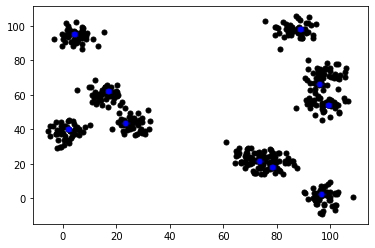

In [8]:
from submodlib.helper import create_kernel
start = time.process_time()
_, K_dense = create_kernel(dataArray, 'dense','euclidean')
    obj2 = FacilityLocationFunction(n=500, mode="dense", sijs = K_dense, separate_rep=False)
print(f"Time taken by instantiation = {time.process_time() - start}")
print(f"Subset 1's FL value = {obj2.evaluate(set1)}")
print(f"Subset 2's FL value = {obj2.evaluate(set2)}")
print(f"Gain of adding another point of same cluster ({subset1[-1]}) to {set1} = {obj2.marginalGain(set1, subset1[-1])}")
print(f"Gain of adding another point of different cluster ({subset2[-1]}) to {set1} = {obj2.marginalGain(set1, subset2[-1])}")
obj2.setMemoization(set1)
print(f"Subset 1's Fast FL value = {obj2.evaluateWithMemoization(set1)}")
print(f"Fast gain of adding another point ({subset1[-1]}) of same cluster to {set1} = {obj2.marginalGainWithMemoization(set1, subset1[-1])}")
start = time.process_time()
greedyList = obj2.maximize(10,'NaiveGreedy', False, False, False)
print(f"Time taken by maximization = {time.process_time() - start}")
print(f"Greedy vector: {greedyList}")
greedyXs = [xs[x[0]] for x in greedyList]
greedyYs = [ys[x[0]] for x in greedyList]
plt.scatter(xs, ys, s=25, color='black', label="Images")
plt.scatter(greedyXs, greedyYs, s=25, color='blue', label="Greedy Set")

## 3. More efficient, scalable sparse kernel alternatives for both flavors

This is achieved simply by changing the mode to "sparse" either in constructor of Facility Location (if sparse kernel is to be created in C++) or in create_kernel() (if sparse kernel is to be created in Python) and specifying the number of neighbors to be used for the creation of sparse kernel.

### a) Sparse similarity kernel creation in C++

Again, user only provides the data matrix, the appropriate parameters and submodlib takes care of the rest. As can be seen in the visualization below, the optimal subset is now not as representative as in the case of dense kernel.

Time taken by instantiation = 0.04937690300000064
Subset 1's FL value = 17.501239776611328
Subset 2's FL value = 19.823204040527344
Gain of adding another point (349) of same cluster to {418, 173, 81, 82, 62} = 1.0765964984893799
Gain of adding another point (5) of different cluster to {418, 173, 81, 82, 62} = 5.943447113037109
Subset 1's Fast FL value = 17.501239776611328
Fast gain of adding another point (349) of same cluster to {418, 173, 81, 82, 62} = 1.0765964984893799
Time taken by maximization = 0.05944890700000016
Greedy vector: [(157, 8.21683406829834), (234, 7.679851055145264), (305, 7.316668510437012), (78, 7.310966968536377), (356, 7.058295249938965), (411, 6.99077033996582), (49, 6.702258110046387), (81, 6.681816577911377), (196, 6.516426086425781), (492, 6.450756072998047)]


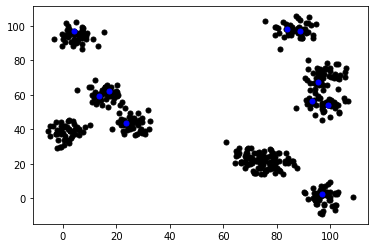

In [9]:
start = time.process_time()
obj3 = FacilityLocationFunction(n=500, data=dataArray, mode="sparse", metric="euclidean", num_neighbors=10)
print(f"Time taken by instantiation = {time.process_time() - start}")
print(f"Subset 1's FL value = {obj3.evaluate(set1)}")
print(f"Subset 2's FL value = {obj3.evaluate(set2)}")
print(f"Gain of adding another point ({subset1[-1]}) of same cluster to {set1} = {obj3.marginalGain(set1, subset1[-1])}")
print(f"Gain of adding another point ({subset2[-1]}) of different cluster to {set1} = {obj3.marginalGain(set1, subset2[-1])}")
obj3.setMemoization(set1)
print(f"Subset 1's Fast FL value = {obj3.evaluateWithMemoization(set1)}")
print(f"Fast gain of adding another point ({subset1[-1]}) of same cluster to {set1} = {obj3.marginalGainWithMemoization(set1, subset1[-1])}")
start = time.process_time()
greedyList = obj3.maximize(10,'NaiveGreedy', False, False, False)
print(f"Time taken by maximization = {time.process_time() - start}")
print(f"Greedy vector: {greedyList}")
greedyXs = [xs[x[0]] for x in greedyList]
greedyYs = [ys[x[0]] for x in greedyList]
plt.scatter(xs, ys, s=25, color='black', label="Images")
plt.scatter(greedyXs, greedyYs, s=25, color='blue', label="Greedy Set")

### b) Sparse similarity kernel creation in Python

Like the dense kernel case, user invokes the create_kernel() helper function and specifies the mode to be "sparse" along with the number of nearest neighbors to be considered.

Time taken by instantiation = 0.23149906199999926
Subset 1's FL value = 17.501235961914062
Subset 2's FL value = 19.82320785522461
Gain of adding another point of same cluster (349) to {418, 173, 81, 82, 62} = 1.0765957832336426
Gain of adding another point of different cluster (5) to {418, 173, 81, 82, 62} = 5.943446636199951
Subset 1's Fast FL value = 17.501235961914062
Fast gain of adding another point (349) of same cluster to {418, 173, 81, 82, 62} = 1.0765957832336426
Time taken by maximization = 0.06424662799999936
Greedy vector: [(157, 8.21683406829834), (234, 7.679847240447998), (305, 7.3166680335998535), (78, 7.310967922210693), (356, 7.058295726776123), (411, 6.990771293640137), (49, 6.7022576332092285), (81, 6.6818156242370605), (196, 6.5164265632629395), (492, 6.450754642486572)]


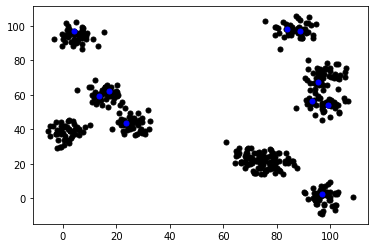

In [10]:
#from submodlib.helper import create_kernel
start = time.process_time()
_, K_sparse = create_kernel(dataArray, 'sparse','euclidean', num_neigh=10)
obj4 = FacilityLocationFunction(n=500, mode = "sparse", sijs = K_sparse, num_neighbors=10)
print(f"Time taken by instantiation = {time.process_time() - start}")
print(f"Subset 1's FL value = {obj4.evaluate(set1)}")
print(f"Subset 2's FL value = {obj4.evaluate(set2)}")
print(f"Gain of adding another point of same cluster ({subset1[-1]}) to {set1} = {obj4.marginalGain(set1, subset1[-1])}")
print(f"Gain of adding another point of different cluster ({subset2[-1]}) to {set1} = {obj4.marginalGain(set1, subset2[-1])}")
obj4.setMemoization(set1)
print(f"Subset 1's Fast FL value = {obj4.evaluateWithMemoization(set1)}")
print(f"Fast gain of adding another point ({subset1[-1]}) of same cluster to {set1} = {obj4.marginalGainWithMemoization(set1, subset1[-1])}")
start = time.process_time()
greedyList = obj4.maximize(10,'NaiveGreedy', False, False, False)
print(f"Time taken by maximization = {time.process_time() - start}")
print(f"Greedy vector: {greedyList}")
greedyXs = [xs[x[0]] for x in greedyList]
greedyYs = [ys[x[0]] for x in greedyList]
plt.scatter(xs, ys, s=25, color='black', label="Images")
plt.scatter(greedyXs, greedyYs, s=25, color='blue', label="Greedy Set")

## Clustered Implementations

In addition to the above, as another alternative for efficient and scalable implementation and to provide for supervised subset selection, submodlib provides clustered implementation of various submodular functions. submodlib does this in two ways:
1. As yet another "mode" in the particular function - for example "clustered" mode in FacilityLocation over and above "dense" and "sparse" modes. See [FacilityLocation](https://submodlib.readthedocs.io/en/latest/functions/facilityLocation.html) for the math.
2. Through a generic Clustered Function implementation which works for any submodular function. See [ClusteredFunction](https://submodlib.readthedocs.io/en/latest/functions/clustered.html) for the math.

For both the alternatives, and in the spirit of giving flexibility, the user has choice to either a) let submodlib do the clustering internally or b) provide the clusters (for example in case of supervised subset selection).

### 1. "clustered" mode in FacilityLocation

#### a) submodlib creates clusters internally

User only provides the data matrix, sets the mode to "clustered" and provides the number of clusters. submodlib internally uses sklearn's [BIRCH](https://scikit-learn.org/stable/modules/clustering.html#birch) to do the clustering. An important point to note here is that the "metric" is not for clustering but for creating the required dense kernels for each cluster. 

Time taken by instantiation = 1.4524346000000001
Subset 1's FL value = 19.016475677490234
Subset 2's FL value = 32.67557907104492
Gain of adding another point (349) of same cluster to {418, 173, 81, 82, 62} = 0.8984317183494568
Gain of adding another point (5) of different cluster to {418, 173, 81, 82, 62} = 8.57044792175293
Subset 1's Fast FL value = 19.016475677490234
Fast gain of adding another point (349) of same cluster to {418, 173, 81, 82, 62} = 0.8984317183494568
Time taken by maximization = 0.018304737999999432
Greedy vector: [(451, 10.472546577453613), (346, 10.190266609191895), (305, 10.160849571228027), (497, 10.061722755432129), (403, 9.9330415725708), (170, 9.379117965698242), (157, 9.106657028198242), (408, 8.467270851135254), (420, 8.218908309936523), (377, 6.971351623535156)]


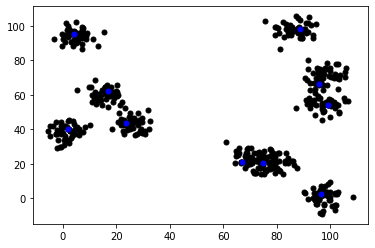

In [11]:
start = time.process_time()
obj5 = FacilityLocationFunction(n=500, data=dataArray, mode="clustered", metric="euclidean", num_clusters=10)
print(f"Time taken by instantiation = {time.process_time() - start}")
print(f"Subset 1's FL value = {obj5.evaluate(set1)}")
print(f"Subset 2's FL value = {obj5.evaluate(set2)}")
print(f"Gain of adding another point ({subset1[-1]}) of same cluster to {set1} = {obj5.marginalGain(set1, subset1[-1])}")
print(f"Gain of adding another point ({subset2[-1]}) of different cluster to {set1} = {obj5.marginalGain(set1, subset2[-1])}")
obj5.setMemoization(set1)
print(f"Subset 1's Fast FL value = {obj5.evaluateWithMemoization(set1)}")
print(f"Fast gain of adding another point ({subset1[-1]}) of same cluster to {set1} = {obj5.marginalGainWithMemoization(set1, subset1[-1])}")
start = time.process_time()
greedyList = obj5.maximize(10,'NaiveGreedy', False, False, False)
print(f"Time taken by maximization = {time.process_time() - start}")
print(f"Greedy vector: {greedyList}")
greedyXs = [xs[x[0]] for x in greedyList]
greedyYs = [ys[x[0]] for x in greedyList]
plt.scatter(xs, ys, s=25, color='black', label="Images")
plt.scatter(greedyXs, greedyYs, s=25, color='blue', label="Greedy Set")

#### b) User provides clusters

Here user provides the clustering in form of the cluster labels for each data point. submodlib internally creates dense kernels per cluster based on the metric specified. 

Time taken by instantiation = 0.9429303579999999
Subset 1's FL value = 18.799583435058594
Subset 2's FL value = 33.285865783691406
Gain of adding another point (349) of same cluster to {418, 173, 81, 82, 62} = 0.8355860114097595
Gain of adding another point (5) of different cluster to {418, 173, 81, 82, 62} = 6.761740207672119
Subset 1's Fast FL value = 18.799583435058594
Fast gain of adding another point (349) of same cluster to {418, 173, 81, 82, 62} = 0.8355860114097595
Time taken by maximization = 0.017454704000000376
Greedy vector: [(451, 10.472546577453613), (342, 10.212627410888672), (346, 10.190266609191895), (403, 9.928557395935059), (157, 9.506034851074219), (170, 9.379117965698242), (408, 8.467270851135254), (252, 7.98236083984375), (275, 7.918851375579834), (350, 7.257321834564209)]


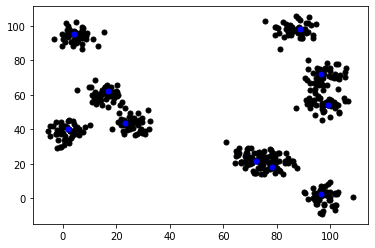

In [12]:
start = time.process_time()
obj6 = FacilityLocationFunction(n=500, data=dataArray, cluster_labels=cluster_ids.tolist(), mode="clustered", metric="euclidean", num_clusters=10)
print(f"Time taken by instantiation = {time.process_time() - start}")
print(f"Subset 1's FL value = {obj6.evaluate(set1)}")
print(f"Subset 2's FL value = {obj6.evaluate(set2)}")
print(f"Gain of adding another point ({subset1[-1]}) of same cluster to {set1} = {obj6.marginalGain(set1, subset1[-1])}")
print(f"Gain of adding another point ({subset2[-1]}) of different cluster to {set1} = {obj6.marginalGain(set1, subset2[-1])}")
obj6.setMemoization(set1)
print(f"Subset 1's Fast FL value = {obj6.evaluateWithMemoization(set1)}")
print(f"Fast gain of adding another point ({subset1[-1]}) of same cluster to {set1} = {obj6.marginalGainWithMemoization(set1, subset1[-1])}")
start = time.process_time()
greedyList = obj6.maximize(10,'NaiveGreedy', False, False, False)
print(f"Time taken by maximization = {time.process_time() - start}")
print(f"Greedy vector: {greedyList}")
greedyXs = [xs[x[0]] for x in greedyList]
greedyYs = [ys[x[0]] for x in greedyList]
plt.scatter(xs, ys, s=25, color='black', label="Images")
plt.scatter(greedyXs, greedyYs, s=25, color='blue', label="Greedy Set")

### 2. Using ClusteredFunction

This is an alternative way of invoking the clustered implementation of a submodular function and is more generic in its handling of different functions.

In [13]:
from submodlib import ClusteredFunction

#### a) submodlib creates clusters internally, implementation creates and uses multiple small kernels

Same as 1a) above, user only provides the data matrix, provides the number of clusters and submodlib does the rest.

Time taken by instantiation = 1.3962726500000002
Subset 1's FL value = 19.016475677490234
Subset 2's FL value = 32.67558288574219
Gain of adding another point (349) of same cluster to {418, 173, 81, 82, 62} = 0.8984317779541016
Gain of adding another point (5) of different cluster to {418, 173, 81, 82, 62} = 8.570448875427246
Subset 1's Fast FL value = 19.016475677490234
Fast gain of adding another point (349) of same cluster to {418, 173, 81, 82, 62} = 0.8984317779541016
Time taken by maximization = 0.5919398190000003
Greedy vector: [(451, 10.47254467010498), (346, 10.190267562866211), (305, 10.160849571228027), (497, 10.061722755432129), (403, 9.933043479919434), (170, 9.379117965698242), (157, 9.106657981872559), (408, 8.467270851135254), (420, 8.21890926361084), (377, 6.971351623535156)]


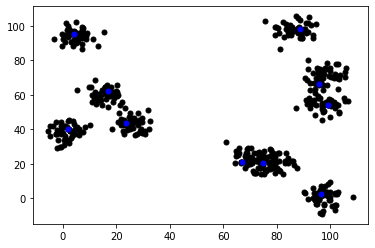

In [14]:
start = time.process_time()
obj7 = ClusteredFunction(n=500, mode="multi", f_name='FacilityLocation', metric='euclidean', data=dataArray, num_clusters=10)
print(f"Time taken by instantiation = {time.process_time() - start}")
print(f"Subset 1's FL value = {obj7.evaluate(set1)}")
print(f"Subset 2's FL value = {obj7.evaluate(set2)}")
print(f"Gain of adding another point ({subset1[-1]}) of same cluster to {set1} = {obj7.marginalGain(set1, subset1[-1])}")
print(f"Gain of adding another point ({subset2[-1]}) of different cluster to {set1} = {obj7.marginalGain(set1, subset2[-1])}")
obj7.setMemoization(set1)
print(f"Subset 1's Fast FL value = {obj7.evaluateWithMemoization(set1)}")
print(f"Fast gain of adding another point ({subset1[-1]}) of same cluster to {set1} = {obj7.marginalGainWithMemoization(set1, subset1[-1])}")
start = time.process_time()
greedyList = obj7.maximize(10,'NaiveGreedy', False, False, False)
print(f"Time taken by maximization = {time.process_time() - start}")
print(f"Greedy vector: {greedyList}")
greedyXs = [xs[x[0]] for x in greedyList]
greedyYs = [ys[x[0]] for x in greedyList]
plt.scatter(xs, ys, s=25, color='black', label="Images")
plt.scatter(greedyXs, greedyYs, s=25, color='blue', label="Greedy Set")

#### b) User provides clusters, implementation creates and uses multiple small kernels

Similar to 1b above where in addition to the above parameters, user provides the clustering information as well to the constructor of Clustered Function. submodlib internally creates dense kernels per cluster based on the metric specified.

Time taken by instantiation = 0.9502459309999995
Subset 1's FL value = 18.799583435058594
Subset 2's FL value = 33.28587341308594
Gain of adding another point (349) of same cluster to {418, 173, 81, 82, 62} = 0.8355860114097595
Gain of adding another point (5) of different cluster to {418, 173, 81, 82, 62} = 6.761740684509277
Subset 1's Fast FL value = 18.799583435058594
Fast gain of adding another point (349) of same cluster to {418, 173, 81, 82, 62} = 0.8355860114097595
Time taken by maximization = 0.5970234169999991
Greedy vector: [(451, 10.47254467010498), (342, 10.212627410888672), (346, 10.190267562866211), (403, 9.928558349609375), (157, 9.506033897399902), (170, 9.379117965698242), (408, 8.467270851135254), (252, 7.982360363006592), (275, 7.918853282928467), (350, 7.257321357727051)]


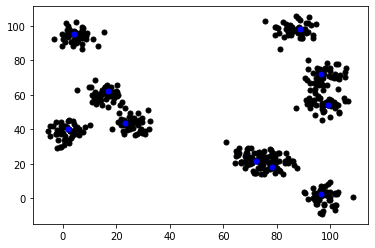

In [15]:
start = time.process_time()
obj8 = ClusteredFunction(n=500, f_name='FacilityLocation', mode="multi", metric='euclidean', data=dataArray, cluster_lab=cluster_ids.tolist(), num_clusters=10)
print(f"Time taken by instantiation = {time.process_time() - start}")
print(f"Subset 1's FL value = {obj8.evaluate(set1)}")
print(f"Subset 2's FL value = {obj8.evaluate(set2)}")
print(f"Gain of adding another point ({subset1[-1]}) of same cluster to {set1} = {obj8.marginalGain(set1, subset1[-1])}")
print(f"Gain of adding another point ({subset2[-1]}) of different cluster to {set1} = {obj8.marginalGain(set1, subset2[-1])}")
obj8.setMemoization(set1)
print(f"Subset 1's Fast FL value = {obj8.evaluateWithMemoization(set1)}")
print(f"Fast gain of adding another point ({subset1[-1]}) of same cluster to {set1} = {obj8.marginalGainWithMemoization(set1, subset1[-1])}")
start = time.process_time()
greedyList = obj8.maximize(10,'NaiveGreedy', False, False, False)
print(f"Time taken by maximization = {time.process_time() - start}")
print(f"Greedy vector: {greedyList}")
greedyXs = [xs[x[0]] for x in greedyList]
greedyYs = [ys[x[0]] for x in greedyList]
plt.scatter(xs, ys, s=25, color='black', label="Images")
plt.scatter(greedyXs, greedyYs, s=25, color='blue', label="Greedy Set")

#### c) submodlib creates clusters internally, implementation creates and uses one big kernel

Same as 2a) above, user only provides the data matrix, provides the number of clusters and submodlib does the rest. However instead of creating a kernel per cluster, it creates one big kernel

Time taken by instantiation = 1.454638893000002
Subset 1's FL value = 19.0164852142334
Subset 2's FL value = 32.675575256347656
Gain of adding another point (349) of same cluster to {418, 173, 81, 82, 62} = 0.8984322547912598
Gain of adding another point (5) of different cluster to {418, 173, 81, 82, 62} = 8.570450782775879
Subset 1's Fast FL value = 19.0164852142334
Fast gain of adding another point (349) of same cluster to {418, 173, 81, 82, 62} = 0.8984322547912598
Time taken by maximization = 0.03182954999999765
Greedy vector: [(451, 10.472545623779297), (346, 10.190271377563477), (305, 10.160848617553711), (497, 10.061724662780762), (403, 9.9330415725708), (170, 9.379117012023926), (157, 9.106657028198242), (408, 8.46727180480957), (420, 8.21890926361084), (377, 6.971353054046631)]


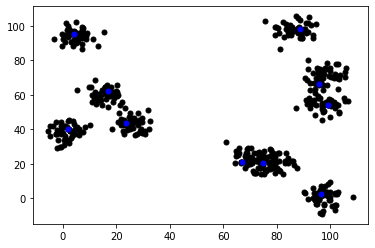

In [16]:
start = time.process_time()
obj9 = ClusteredFunction(n=500, mode="single", f_name='FacilityLocation', metric='euclidean', data=dataArray, num_clusters=10)
print(f"Time taken by instantiation = {time.process_time() - start}")
print(f"Subset 1's FL value = {obj9.evaluate(set1)}")
print(f"Subset 2's FL value = {obj9.evaluate(set2)}")
print(f"Gain of adding another point ({subset1[-1]}) of same cluster to {set1} = {obj9.marginalGain(set1, subset1[-1])}")
print(f"Gain of adding another point ({subset2[-1]}) of different cluster to {set1} = {obj9.marginalGain(set1, subset2[-1])}")
obj9.setMemoization(set1)
print(f"Subset 1's Fast FL value = {obj9.evaluateWithMemoization(set1)}")
print(f"Fast gain of adding another point ({subset1[-1]}) of same cluster to {set1} = {obj9.marginalGainWithMemoization(set1, subset1[-1])}")
start = time.process_time()
greedyList = obj9.maximize(10,'NaiveGreedy', False, False, False)
print(f"Time taken by maximization = {time.process_time() - start}")
print(f"Greedy vector: {greedyList}")
greedyXs = [xs[x[0]] for x in greedyList]
greedyYs = [ys[x[0]] for x in greedyList]
plt.scatter(xs, ys, s=25, color='black', label="Images")
plt.scatter(greedyXs, greedyYs, s=25, color='blue', label="Greedy Set")

#### d) User provides clusters, implementation creates and uses one big kernel

Similar to 2b above where in addition to the above parameters, user provides the clustering information as well to the constructor of Clustered Function. submodlib internally creates one big kernel based on the metric provided

Time taken by instantiation = 0.2781191110000023
Subset 1's FL value = 18.799592971801758
Subset 2's FL value = 33.285865783691406
Gain of adding another point (349) of same cluster to {418, 173, 81, 82, 62} = 0.8355865478515625
Gain of adding another point (5) of different cluster to {418, 173, 81, 82, 62} = 6.761741638183594
Subset 1's Fast FL value = 18.799592971801758
Fast gain of adding another point (349) of same cluster to {418, 173, 81, 82, 62} = 0.8355865478515625
Time taken by maximization = 0.030576306000000386
Greedy vector: [(451, 10.472545623779297), (342, 10.212626457214355), (346, 10.190271377563477), (403, 9.92855453491211), (157, 9.506034851074219), (170, 9.379117012023926), (408, 8.46727180480957), (252, 7.98236083984375), (275, 7.918850421905518), (350, 7.257322788238525)]


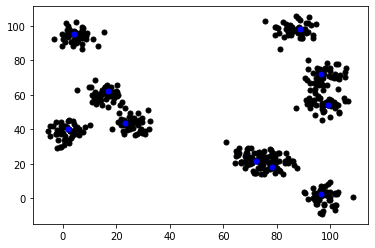

In [17]:
start = time.process_time()
obj10 = ClusteredFunction(n=500, f_name='FacilityLocation', mode="single", metric='euclidean', data=dataArray, cluster_lab=cluster_ids.tolist(), num_clusters=10)
print(f"Time taken by instantiation = {time.process_time() - start}")
print(f"Subset 1's FL value = {obj10.evaluate(set1)}")
print(f"Subset 2's FL value = {obj10.evaluate(set2)}")
print(f"Gain of adding another point ({subset1[-1]}) of same cluster to {set1} = {obj10.marginalGain(set1, subset1[-1])}")
print(f"Gain of adding another point ({subset2[-1]}) of different cluster to {set1} = {obj10.marginalGain(set1, subset2[-1])}")
obj10.setMemoization(set1)
print(f"Subset 1's Fast FL value = {obj10.evaluateWithMemoization(set1)}")
print(f"Fast gain of adding another point ({subset1[-1]}) of same cluster to {set1} = {obj10.marginalGainWithMemoization(set1, subset1[-1])}")
start = time.process_time()
greedyList = obj10.maximize(10,'NaiveGreedy', False, False, False)
print(f"Time taken by maximization = {time.process_time() - start}")
print(f"Greedy vector: {greedyList}")
greedyXs = [xs[x[0]] for x in greedyList]
greedyYs = [ys[x[0]] for x in greedyList]
plt.scatter(xs, ys, s=25, color='black', label="Images")
plt.scatter(greedyXs, greedyYs, s=25, color='blue', label="Greedy Set")